In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
# Clean column names
df.columns = df.columns.str.strip()


In [4]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [5]:
# Rename columns for simplicity
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

In [6]:
# Sort by date
df = df.sort_values(by='Date')

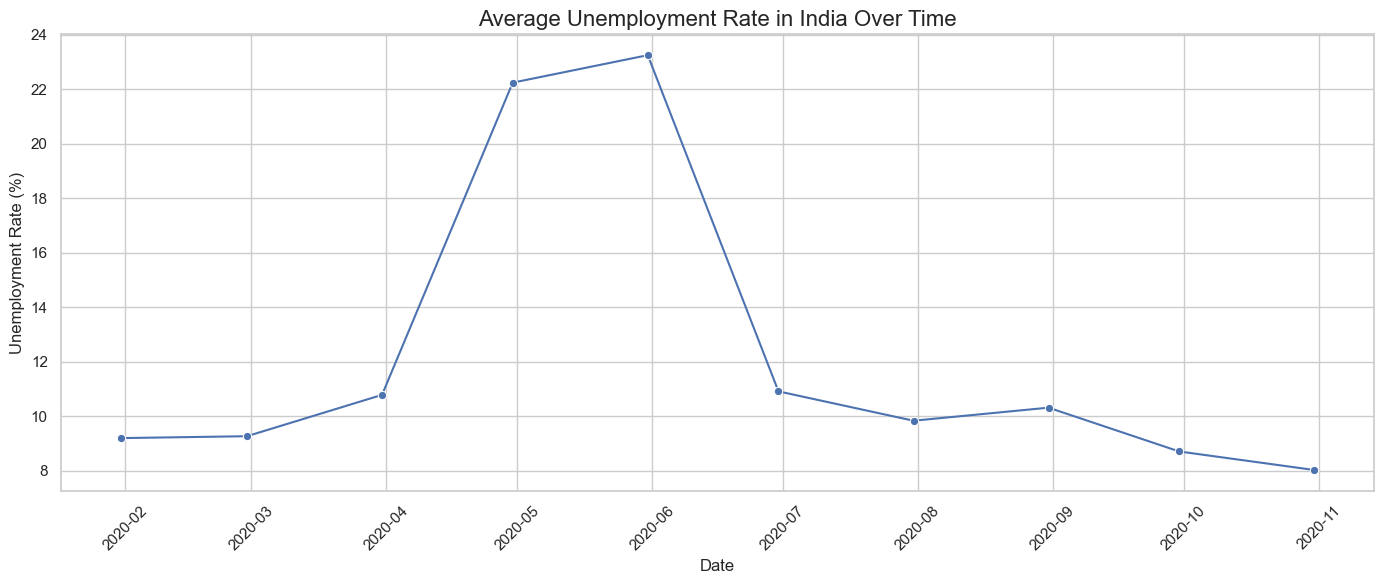

In [8]:
# 1. National Average Trend

sns.set(style="whitegrid")
monthly_avg = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='Date', y='Unemployment_Rate', marker='o')
plt.title("Average Unemployment Rate in India Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

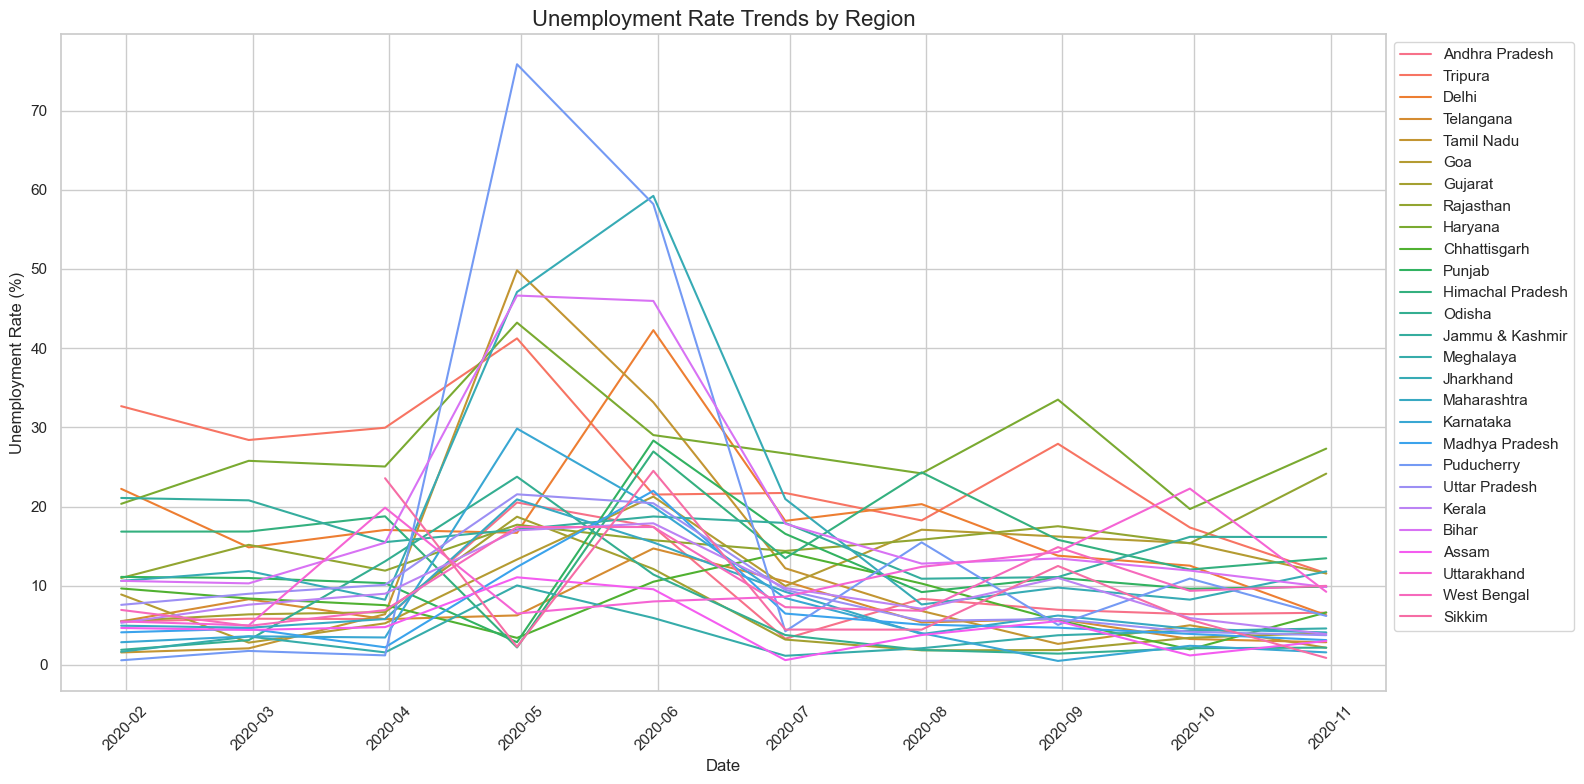

In [10]:
# 2. Region-wise Unemployment

plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Region')
plt.title("Unemployment Rate Trends by Region", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

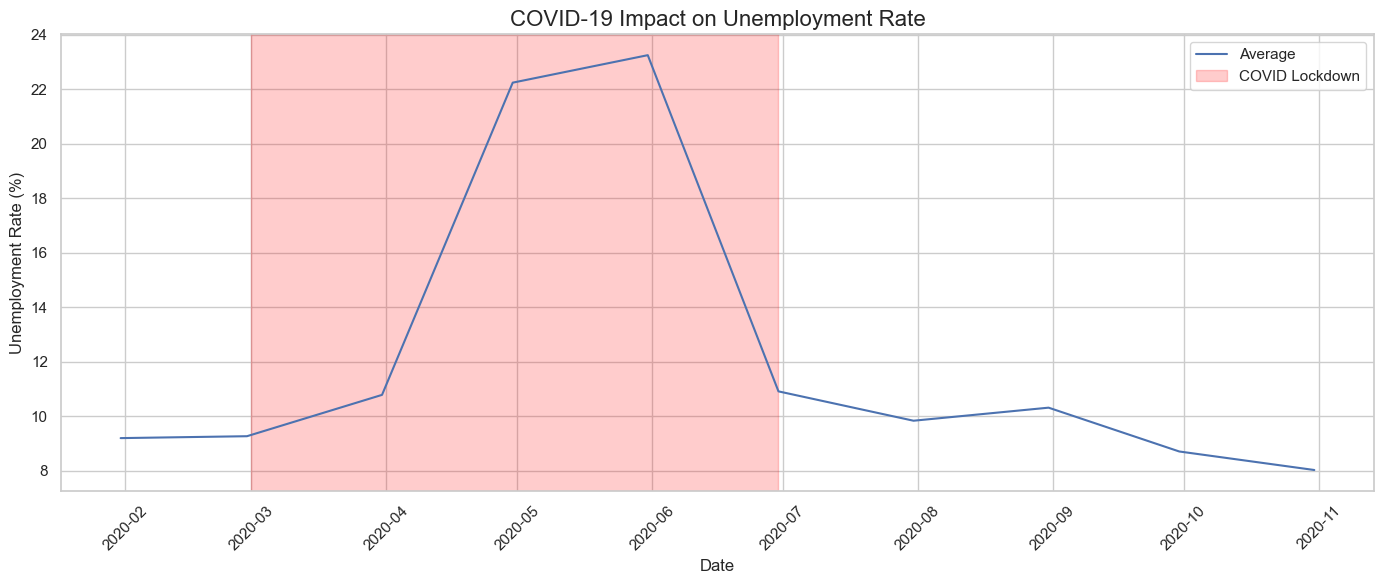

In [12]:
# 3. COVID-19 Lockdown Impact

covid_period = (df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='Date', y='Unemployment_Rate', label='Average')
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-06-30'),
            color='red', alpha=0.2, label='COVID Lockdown')
plt.title("COVID-19 Impact on Unemployment Rate", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

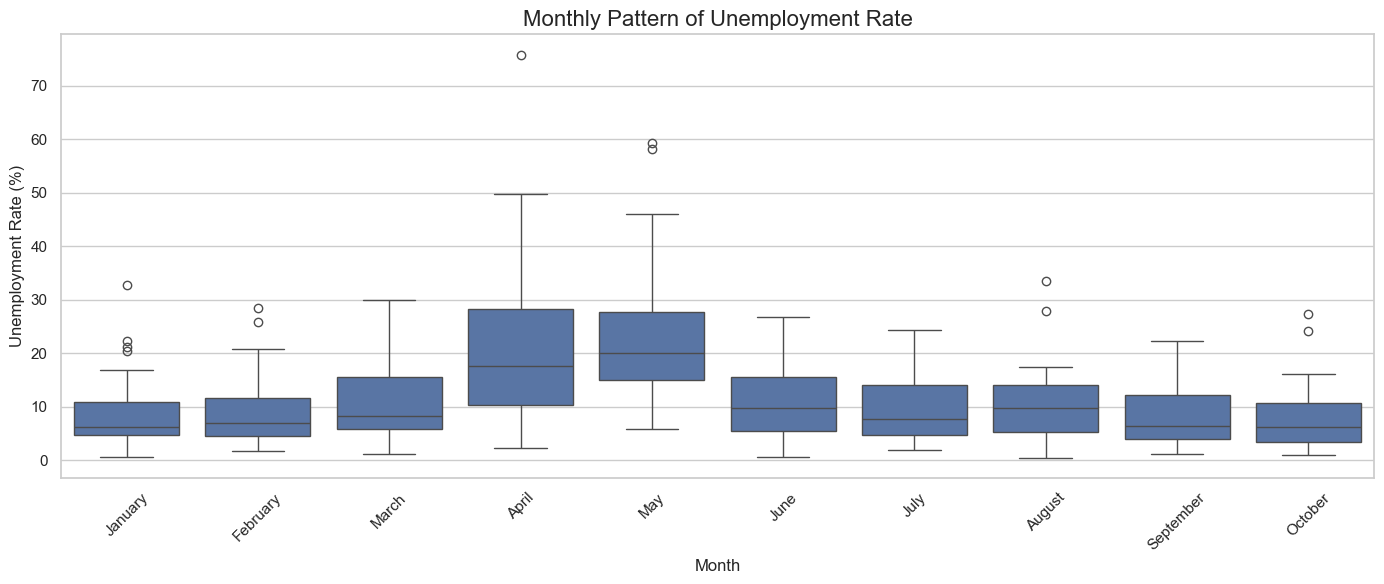

In [14]:
# 4. Monthly Pattern (Boxplot)

df['Month'] = df['Date'].dt.month_name()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Month', y='Unemployment_Rate')
plt.title("Monthly Pattern of Unemployment Rate", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
